# Cambia la frecuencia de tus datos

Adentrémonos en la función **resample**, una herramienta esencial para quienes trabajan con datos y  series temporales. En esta sesión, descubrirás cómo cambiar la frecuencia de tus datos temporales, ajustando series de minutos a horas o de días a semanas, abriendo un mundo de posibilidades para un análisis más profundo y significativo.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
f = '../data/Temixco_2018_10Min.csv'
tmx = pd.read_csv(f,index_col=0,parse_dates=True)
tmx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52560 entries, 2018-01-01 00:00:00 to 2018-12-31 23:50:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ib      52423 non-null  float64
 1   Ig      52423 non-null  float64
 2   To      52560 non-null  float64
 3   RH      52560 non-null  float64
 4   WS      52560 non-null  float64
 5   WD      52560 non-null  float64
 6   P       52560 non-null  float64
dtypes: float64(7)
memory usage: 3.2 MB


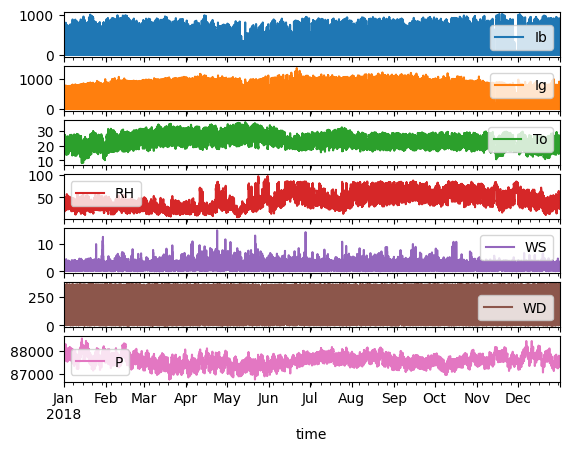

In [3]:
tmx.plot(subplots=True);

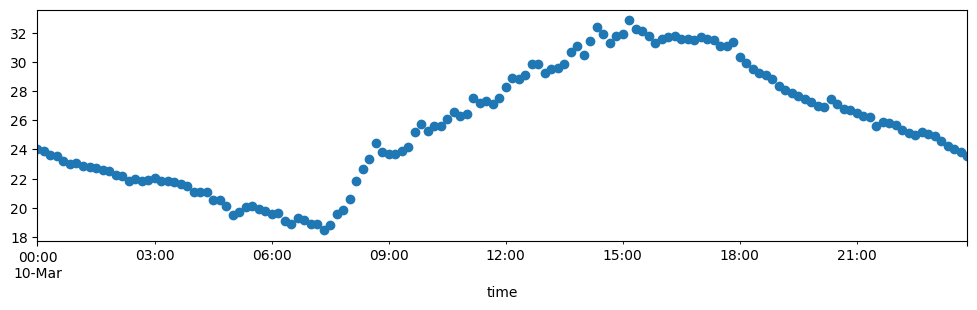

In [4]:
tmx.loc['2018-03-10','To'].plot(subplots=True,figsize=(12,3),style='o');

In [5]:
tmx[['To']].resample('H').max()

,To
time,
2018-01-01 00:00:00,19.23
2018-01-01 01:00:00,19.25
2018-01-01 02:00:00,18.24
2018-01-01 03:00:00,17.49
2018-01-01 04:00:00,16.58
...,...
2018-12-31 19:00:00,22.39
2018-12-31 20:00:00,19.58
2018-12-31 21:00:00,19.29


In [6]:
tmx[['To']].resample('H',closed="right").max()

,To
time,
2017-12-31 23:00:00,18.70
2018-01-01 00:00:00,19.23
2018-01-01 01:00:00,19.25
2018-01-01 02:00:00,18.24
2018-01-01 03:00:00,17.49
...,...
2018-12-31 19:00:00,21.87
2018-12-31 20:00:00,19.49
2018-12-31 21:00:00,19.11


array([<Axes: xlabel='time'>], dtype=object)

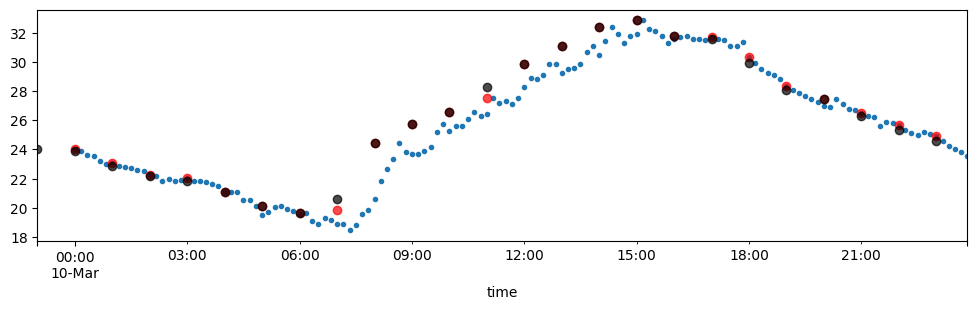

In [14]:
tmx.loc['2018-03-10','To'].plot(subplots=True,figsize=(12,3),style='.')
tmx.loc['2018-03-10','To'].resample('H').max().plot(subplots=True,
                                                    figsize=(12,3),
                                                    style='o',
                                                   color='red',
                                                   alpha=0.7)


<Axes: xlabel='time'>

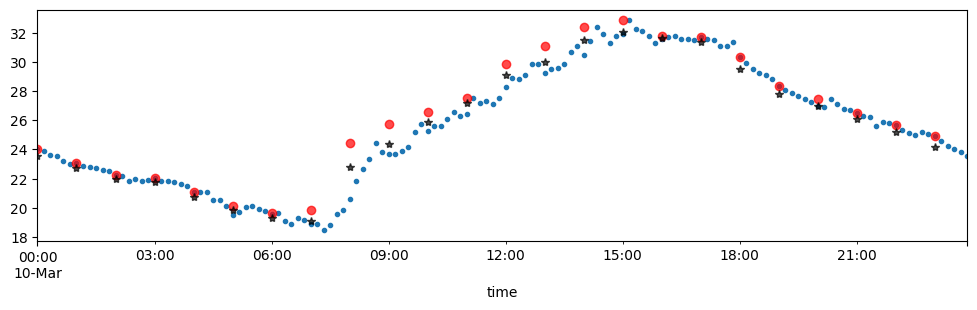

In [7]:
tmx.loc['2018-03-10','To'].plot(subplots=True,figsize=(12,3),style='.')
tmx.loc['2018-03-10','To'].resample('H').max().plot(figsize=(12,3),
                                                    style='o',
                                                    color='red',
                                                    alpha=0.7)
tmx.loc['2018-03-10','To'].resample('H').mean().plot(figsize=(12,3),
                                                     style='*',
                                                     color='black',
                                                     alpha=0.7)

In [8]:
tmx.To.resample('D').mean()

time
2018-01-01    21.073333
2018-01-02    19.813264
2018-01-03    19.910069
2018-01-04    19.705417
2018-01-05    20.782639
                ...    
2018-12-27    20.374861
2018-12-28    19.778750
2018-12-29    20.654167
2018-12-30    20.726944
2018-12-31    20.230903
Freq: D, Name: To, Length: 365, dtype: float64

In [9]:
tmx.To.resample('Y').agg(['mean','std','max','min','sum'])

,mean,std,max,min,sum
time,,,,,
2018-12-31,22.838098,4.443339,35.87,8.16,1200370.41


In [10]:
tmx.To.resample('30S').max()  # min, std, no funciona

time
2018-01-01 00:00:00    18.70
2018-01-01 00:00:30      NaN
2018-01-01 00:01:00      NaN
2018-01-01 00:01:30      NaN
2018-01-01 00:02:00      NaN
                       ...  
2018-12-31 23:48:00      NaN
2018-12-31 23:48:30      NaN
2018-12-31 23:49:00      NaN
2018-12-31 23:49:30      NaN
2018-12-31 23:50:00    17.75
Freq: 30S, Name: To, Length: 1051181, dtype: float64

In [19]:
tmx.To.resample('30S').interpolate()

time
2018-01-01 00:00:00    18.7000
2018-01-01 00:00:30    18.7125
2018-01-01 00:01:00    18.7250
2018-01-01 00:01:30    18.7375
2018-01-01 00:02:00    18.7500
                        ...   
2018-12-31 23:48:00    17.7980
2018-12-31 23:48:30    17.7860
2018-12-31 23:49:00    17.7740
2018-12-31 23:49:30    17.7620
2018-12-31 23:50:00    17.7500
Freq: 30S, Name: To, Length: 1051181, dtype: float64

<Axes: xlabel='time'>

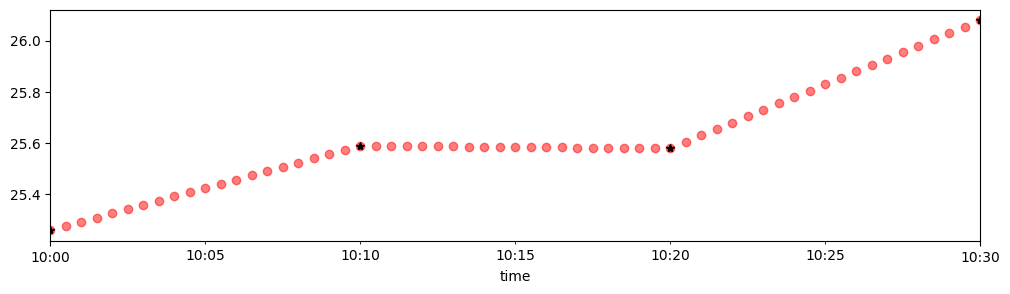

In [12]:
tmx.loc['2018-03-10 10:00':'2018-03-10 10:30','To'].resample('30S').interpolate().plot(figsize=(12,3),
                                                                                       style='o',
                                                                                       color='red',
                                                                                       alpha=0.5
                                                                                      )
tmx.loc['2018-03-10 10:00':'2018-03-10 10:30','To'].plot(style='*',
                                                         color='k')